# A joint multilevel model for CAR 
Using multilevel.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF] [ S | GMRF] $$

In [1]:
## Run the script
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
source("model2_multilevel/run-joint-multilevel.R")


[1] "Load data source and preprocess"


Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [46]:

trials = rep(1,2 *nK)
burnin = 5000
n.sample = 10000
thin = 1



l <- list()
i = 1
nS = dim(Py)[1]
validate = createFolds(y = DataFrame$species, k=7 , returnTrain = FALSE)
validate.index.presences = lapply(validate, function(x){x + nS})

## customised for the multilevel preprocessing (i.e. DD instead of the trad. variable that I called `DataFrame` )
DD$presences <- DD$response
DD$predicted_values_CV <- NA

for (fold in validate.index.presences) {
    
    ## Substitue by NA (to be predicted..)
    DD$response[fold] <- NA
    
    model2 <- S.CARmultilevel(formula,family = 'binomial',
                             trials=trials,
                             W=M_bis,
                             ind.area=idarea,
                             ind.re=factor(idarea),
                             rho=1,
                             burnin=burnin,
                             n.sample=n.sample,
                             data=DD)
    
    ## return DataFrame$species to original 
    ## Beware of DD...
    DD$response <- DD$presences
    ## Return original values
    ## Aquí hay que ver si los fitted values corresponden al indice 
    predicted.probability = model2$fitted.values[fold]
    DD$predicted_values_CV[fold] <- predicted.probability

    pROC_obj <- roc(DD$response[fold],predicted.probability)

    l[[i]] <- pROC_obj
    i = i + 1
}

Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  163.1 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  161.3 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  162.8 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  164.4 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  164.5 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  157.6 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  152 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


In [49]:
presences.index = seq(nK + 1 ,dim(DD)[1])

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

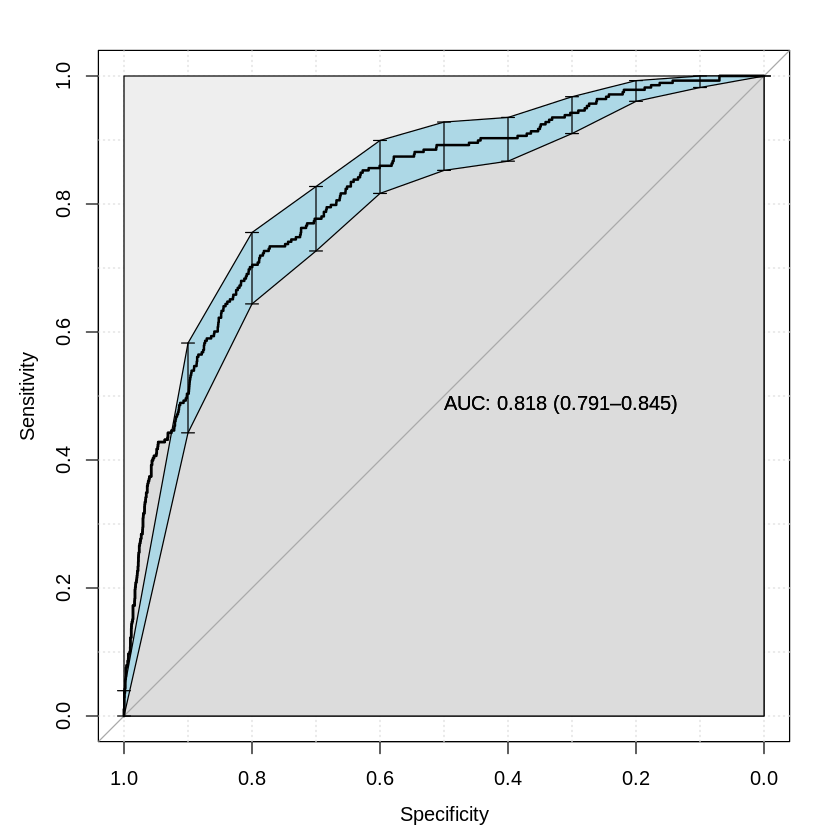

In [48]:
pROC_obj <- roc(DD$response[presences.index],DD$predicted_values_CV[presences.index],
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")



## Remember to check likelihood modelfit

In [50]:
model2$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3545.0255      658.9803     3581.0414      586.7919    -1817.1975 
loglikelihood 
   -1113.5325

In [3]:
model2$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),1.9075,1.5459,2.2877,50000,46.2,568.0,2.2
Disttoroadm,0.0002,0.0000,0.0003,50000,46.2,2023.5,1.0
Populationm,0.0004,0.0002,0.0005,50000,46.2,1449.9,1.6
Elevationm,-0.0015,-0.0017,-0.0012,50000,46.2,377.4,-3.1
MeanTempm,-0.0026,-0.0030,-0.0023,50000,46.2,231.2,-2.0
tau2,8.1821,5.0419,11.8709,50000,100.0,76.2,2.0
sigma2,0.0063,0.0020,0.0348,50000,100.0,10.1,-2.0
rho,1.0000,1.0000,1.0000,NA,NA,NA,NA


## Some plots and analysis for convergence


In [175]:
library(coda)

## $\tau^{2}$

In [190]:
plot(model3$samples$)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

ERROR: Error in plot(model3$samples$tau2): object 'model3' not found


## $\sigma^2$

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


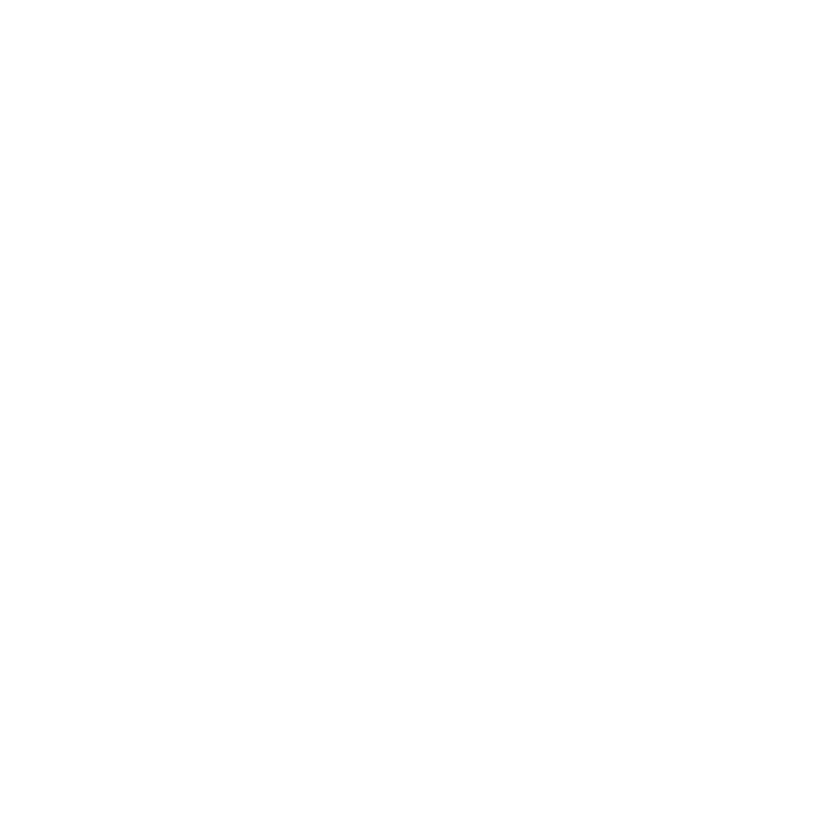

In [185]:
plot(model2$samples$sigma2)
#plot(results$ind.model.S$model.results$samples$sigma2)
#plot(results$ind.model.P$model.results$samples$sigma2)

## $\beta$

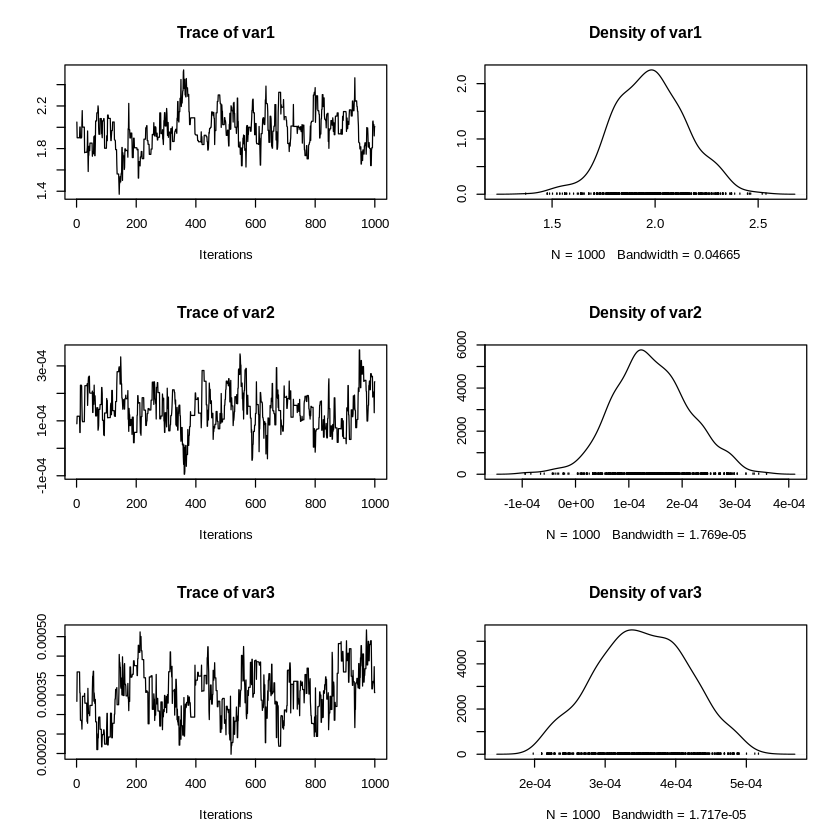

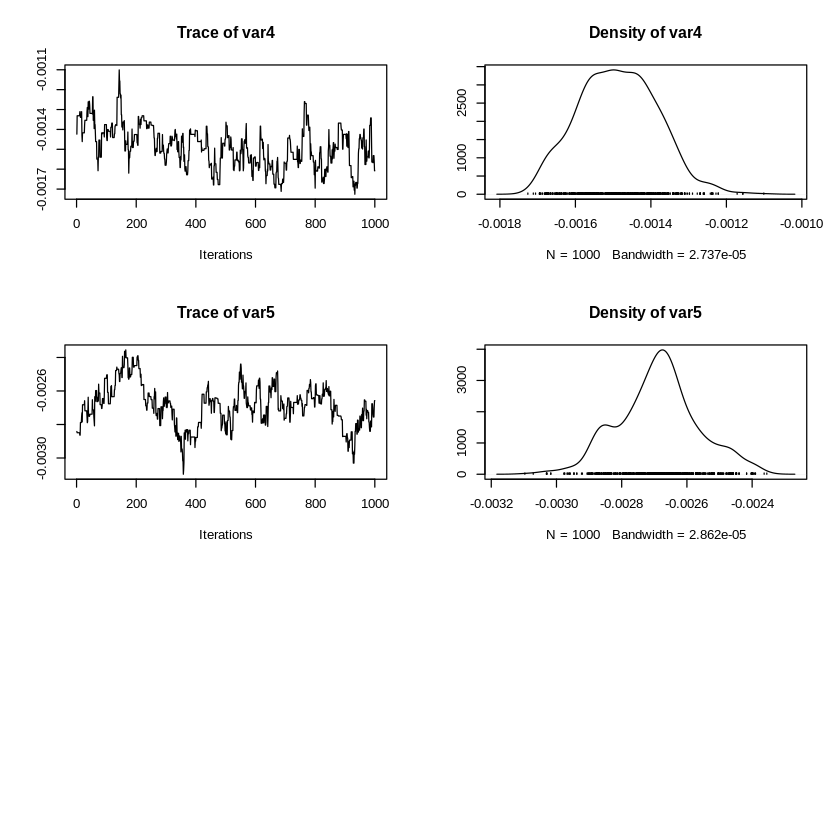

In [186]:
plot(model2$samples$beta)

#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

### Extract and export Random Effects in the shape of raw sample

In [188]:
model2$samples$zeta

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 1 
Thinning interval = 1 
[1] NA

In [155]:

sample.re <- t(model2$samples$phi + model2$samples$zeta)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_randomeffect_multilevel.csv'
write.csv(re.chain,file2)

ERROR: Error in model2$samples$phi + model2$samples$zeta: non-conformable arrays


In [166]:
sample.re <- t(model2$samples$phi)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_phi_multilevel.csv'
write.csv(re.chain,file2)

In [167]:
sample.re <- t(model2$samples$zeta)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_zeta_multilevel.csv'
write.csv(re.chain,file2)

Warning message in cbind(TDF$cellids, sample.re):
“number of rows of result is not a multiple of vector length (arg 1)”

In [168]:
## P and S
## divide samples for S and P according to the order given up
fitted = model2$fitted.values
S <- fitted[1:nK]
P <- fitted[(nK +1) : (2*nK) ]
chain = cbind(TDF$cellids,S,P)
file_ = '/outputs/presence_only_models/modelCAR_model2_PS_multilevel.csv'
write.csv(chain,file_)


## Diagnostics, Mr. Gelmans, et.al

## Sample the posterior 

In [161]:
post.sample_p = data.frame(model2$samples$fitted)

In [163]:
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
## divide samples for S and P according to the order given up
pred.S <- pss[,1:nK]
pred.P <- pss[,(nK +1) : (2*nK) ]
sumpss <- colSums(pred.S)
nsample <- nrow(pred.S)
prob_pss <- sumpss / nsample
sumpss <- colSums(pred.S)
nsample <- nrow(pred.S)
prob_pss <- sumpss / nsample
probpres = prob_pps * prob_pss

In [165]:
chain = cbind(TDF$cellids,probpres,prob_pps,prob_pss)
file_ = '/outputs/presence_only_models/modelCAR_model2_fitted_multilevel.csv'
write.csv(chain,file_)

## Posterior análisis with a varying C $\tau^2, \sigma^2$ denominator

In [609]:
# Read the file
bfile = '/outputs/presence_only_models/joint-model2-benchmark-denominator.csv'
res <- read.csv(bfile)

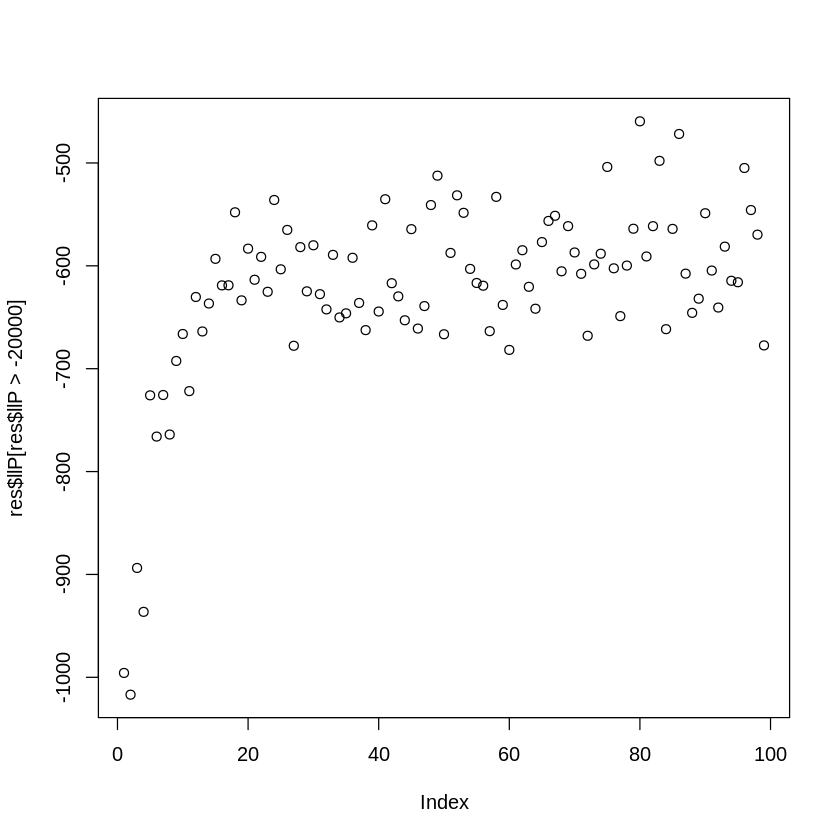